In [1]:
import pandas as pd

In [129]:
path_file = "DataSet-pest.xlsx"
col_types = {"Documento":str, "Categoria":str}
df = pd.read_excel(path_file, dtype=col_types)
df

,Documento,Fecha,Texto,Categoria
0,0,2021-01-02 00:00:00,Primero Emelec y cinco años después el hermano...,no pest
1,1,2021-01-03 00:00:00,#ElAgroTrabaja por el bienestar de los ecuator...,Social
2,2,2021-01-01 00:00:00,Es nuestro derecho a recibir a tiempo los recu...,Económico
3,3,2020-03-23 00:00:00,Sin distanciamiento Incumpliendo disposiciones...,Social
4,4,2021-01-03 00:00:00,Guayaquil | La Intendencia de Policía del Guay...,Social
...,...,...,...,...
1095,1096,2021-02-17 00:00:00,Sólo ganó en dos provincias Pichincha y Galápa...,no pest
1096,1097,2021-02-17 00:00:00,Cuando un juez le dictaminó que use un grillet...,no pest
1097,1098,2021-02-17 00:00:00,"Sres \n@BancoPichincha\n, hasta cuándo vamos a...",no pest
1098,1099,2021-02-17 00:00:00,#AMEGuayas continua su recorrido de visita a l...,no pest


In [113]:
df.columns.values

array(['Documento', 'Fecha', 'Texto', 'Categoria'], dtype=object)

In [130]:
from io import StringIO
col = ['Texto', 'Categoria']
df = df[col]
df = df[pd.notnull(df['Categoria'])]

df.columns = ['Texto', 'Categoria']

df['category_id'] = df['Categoria'].factorize()[0]
category_id_df = df[['Categoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','Categoria']].values)

df.head()


,Texto,Categoria,category_id
0,Primero Emelec y cinco años después el hermano...,no pest,0
1,#ElAgroTrabaja por el bienestar de los ecuator...,Social,1
2,Es nuestro derecho a recibir a tiempo los recu...,Económico,2
3,Sin distanciamiento Incumpliendo disposiciones...,Social,1
4,Guayaquil | La Intendencia de Policía del Guay...,Social,1


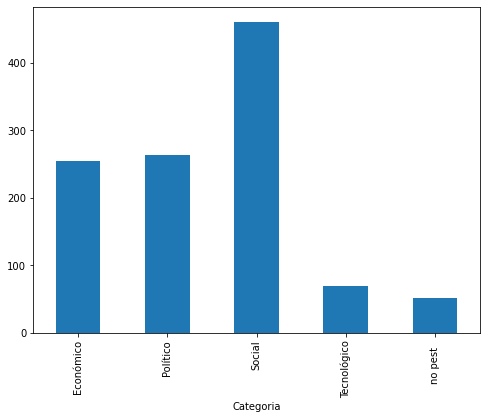

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Categoria').Texto.count().plot.bar(ylim=0)
plt.show()



In [6]:
df.Categoria[:20]

0       no pest  
1          Social
2       Económico
3          Social
4          Social
5          Social
6          Social
7          Social
8          Social
9          Social
10         Social
11    Tecnológico
12    Tecnológico
13         Social
14         Social
15         Social
16         Social
17         Social
18         Social
19         Social
Name: Categoria, dtype: object

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
tfidf = TfidfVectorizer (sublinear_tf = True, min_df = 5,norm = 'l2', encoding = 'latin-1', ngram_range = (1, 2), stop_words = 'english')
#count_vect = CountVectorizer()
# features = tfidf.fit_transform(df['Categoria']) .toarray()
features = tfidf.fit_transform(df['Texto'].values.astype('U')) .toarray()
labels = df.category_id
features.shape

(1100, 1212)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Texto'].values.astype('U')) .toarray()
X_train_counts.shape

(1100, 5983)

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(1100, 5983)

In [10]:
>>> tfidf_transformer = TfidfTransformer()
>>> X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
>>> X_train_tfidf.shape

(1100, 5983)

In [11]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(features, df.Categoria)

In [12]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for Texto, Categoria


SyntaxError: invalid syntax (<ipython-input-12-8b729fc042ad>, line 7)

In [13]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Categoria, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names()) [indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Categoria))
    print(" .La mayoría de los unigramas correlacionados:\n. {}".format('\n.'.join(unigrams[-N:])))
    print(" .Bigrams más correlacionados:\n. {}".format('\n.'.join(bigrams[-N:])))


# 'Económico':
 .La mayoría de los unigramas correlacionados:
. inversión
.millones
 .Bigrams más correlacionados:
. una inversión
.la economía
# 'Político':
 .La mayoría de los unigramas correlacionados:
. política
.derechos
 .Bigrams más correlacionados:
. la judicatura
.las elecciones
# 'Social':
 .La mayoría de los unigramas correlacionados:
. covid
.guayaquil
 .Bigrams más correlacionados:
. en guayaquil
.covid 19
# 'Tecnológico':
 .La mayoría de los unigramas correlacionados:
. tecnología
.electrónico
 .Bigrams más correlacionados:
. el comercio
.comercio electrónico
# 'no pest  ':
 .La mayoría de los unigramas correlacionados:
. lasso
.le
 .Bigrams más correlacionados:
. los que
.son los


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Texto'], df['Categoria'],
random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [31]:
print(clf.predict(count_vect.transform(["La fiscal del Guayas, Yanina Villagómez, acusa a Michel Bucaram y a Gabriela Pazmiño de coautores del delito de delincuencia organizada."])))

['Social']


In [16]:
print(clf.predict(count_vect.transform(["Junta Electoral del Guayas rechazó inscripción de candidatura de Daniel Salcedo"])))

['Político']


In [15]:
print(clf.predict(count_vect.transform(["Guayas apunta a reactivar la economía con una oferta de turismo de distinta modalidad"])))

['Económico']


In [15]:
print(clf.predict(count_vect.transform(["Que bonita es la democracia. Que hace que una persona gane y otra pierda aunque con 1 sólo voto de diferencia Arauz ganó por primera vez en Guayas eso quiere decir que vamos avanzando."])))

['Político']


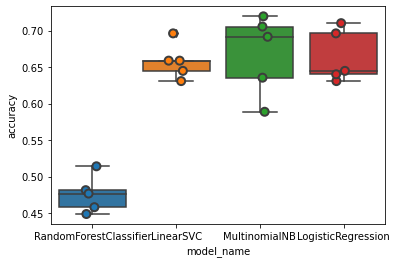

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, 
random_state=0),
         LinearSVC(),
         MultinomialNB(),
         LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name =model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate (accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name','fold_idx','accuracy'])
    
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()
    

In [17]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.657944
LogisticRegression        0.664486
MultinomialNB             0.668224
RandomForestClassifier    0.475701
Name: accuracy, dtype: float64

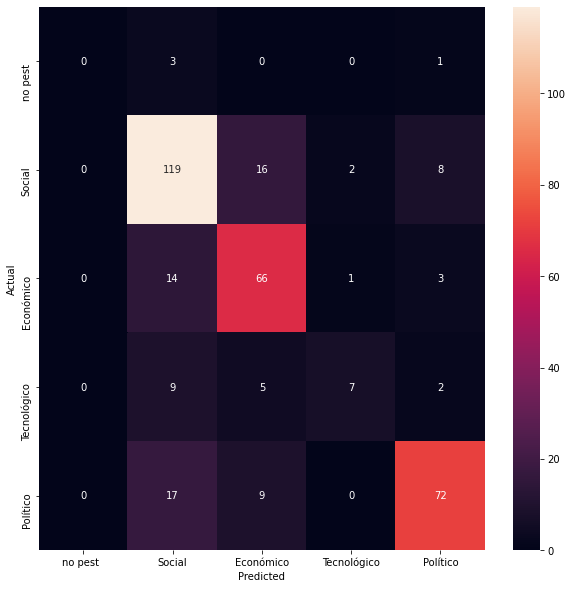

In [18]:
#Matriz de confusión
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33,
random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
           xticklabels=category_id_df.Categoria.values,
yticklabels=category_id_df.Categoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
              print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], 
conf_mat[actual, predicted]))
display(df.loc[indices_test[(y_test == actual) & (y_pred == 
predicted)]][['Texto', 'Categoria']])
print('')


'Económico' predicted as 'Social' : 14 examples.
'Político' predicted as 'Social' : 17 examples.
'Social' predicted as 'Económico' : 16 examples.


,Texto,Categoria
457,El Consejo de la Judicatura ratifica hoy su co...,Político
1020,"Jimmy del Salto, delegado de la organización p...",Político
474,AHORA | Se desarrolla capacitación virtual dir...,Político
758,Secretaría del Agua #DHGuayas analiza reforma ...,Político
712,El equipo de campaña de Álvaro Noboa dice que ...,Político
...,...,...
493,Ya tenemos los primeros presos politicos por e...,Político
451,Dialogamos con medios de comunicación sobre el...,Político
210,Funcionarios electorales de la Delegación de #...,Político
306,.@CesarMontufar51\n en #PolíticamenteCorrectoE...,Político


In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Categoria'].unique()))

              precision    recall  f1-score   support

   no pest         0.00      0.00      0.00         4
      Social       0.73      0.82      0.78       145
   Económico       0.69      0.79      0.73        84
 Tecnológico       0.70      0.30      0.42        23
    Político       0.84      0.73      0.78        98

    accuracy                           0.75       354
   macro avg       0.59      0.53      0.54       354
weighted avg       0.74      0.75      0.74       354



In [131]:
X = df.drop('category_id', axis=1)
y= df['category_id']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [133]:
print(X_train)

                                                  Texto    Categoria
799   El Prefecto del Guayas \n@clmoralesb\n recibió...    Económico
397   Qué es la licencia de conducir digital y cómo ...  Tecnológico
771   Del 28 marzo al 21 de diciembre de 2020, la @C...    Económico
621   Familiares de Lisbeth Baquerizo acudieron a la...       Social
839   En Guayaquil detienen a un sujeto con 44 mil d...       Social
...                                                 ...          ...
119   #Guayas | En los centros de salud de los canto...       Social
367   Una ordenanza en Guayaquil para restringir las...       Social
701   Candidatura de Álvaro Noboa no sería posible, ...     Político
91    En reunión con delegados del sector pesquero a...    Económico
1020  Jimmy del Salto, delegado de la organización p...     Político

[880 rows x 2 columns]


In [125]:
print(y_train)

1009    4
31      4
1007    4
994     4
792     2
       ..
1044    4
259     1
474     4
860     1
523     1
Name: category_id, Length: 880, dtype: int64


In [134]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'El Prefecto del Guayas \n@clmoralesb\n recibió en su despacho a \n@parosemena\n presidente de \n@lacamaragye\n para demostrar la apertura del #GobiernoDelGuayas hacia la inversión de la empresa privada en beneficio del desarrollo de la provincia.'

In [43]:
accuracy_score(y_true, y_pred, normalize=False)

2

In [44]:
import numpy as np
accuracy_score(np.array([[0,1],[1,1]]), np.ones((2,2)))

0.5